[InternLM-20b](https://huggingface.co/internlm/internlm2-20b)

[InternLM-7b](https://huggingface.co/internlm/internlm2-7b)

T4 GPU

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
!pip install einops
!pip install bitsandbytes
!pip install flash-attn --no-build-isolation
!pip install accelerate
!pip install optimum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.2 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

from transformers import (
    AutoModelForSeq2SeqLM,
    BitsAndBytesConfig,
)

from torch.utils.data import TensorDataset,DataLoader, RandomSampler, SequentialSampler
import pandas as pd
from tqdm import tqdm

[No of GPU required](https://huggingface.co/spaces/Vokturz/can-it-run-llm)

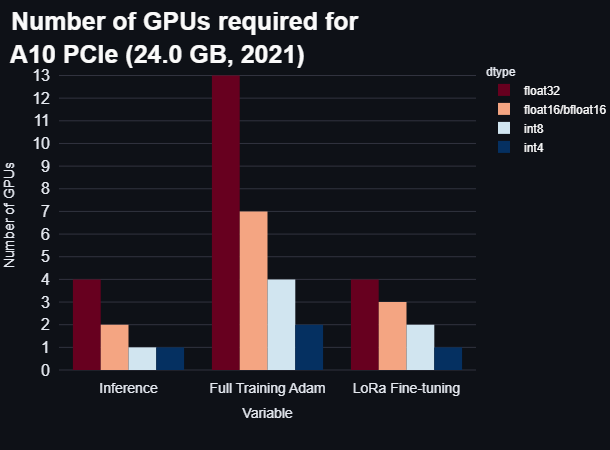

In [2]:
# prompt: code to plot Image

from IPython.display import Image
Image(filename='newplot.png', width=1000)

**Inference Without Optimization**

In [ ]:

# Load model directly
# from transformers import AutoModelForCausalLM
# model = AutoModelForCausalLM.from_pretrained("internlm/internlm2-7b", trust_remote_code=True)

tokenizer = AutoTokenizer.from_pretrained("internlm/internlm2-20b", trust_remote_code=True)
# Set `torch_dtype=torch.float16` to load model in float16, otherwise it will be loaded as float32 and might cause OOM Error.
model = AutoModelForCausalLM.from_pretrained("internlm/internlm2-20b", torch_dtype=torch.float16, trust_remote_code=True)#.cuda()
model = model.eval()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/393 [00:00<?, ?B/s]

tokenization_internlm2_fast.py:   0%|          | 0.00/7.80k [00:00<?, ?B/s]

tokenization_internlm2.py:   0%|          | 0.00/8.81k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/internlm/internlm2-20b:
- tokenization_internlm2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/internlm/internlm2-20b:
- tokenization_internlm2_fast.py
- tokenization_internlm2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer.model:   0%|          | 0.00/1.48M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/95.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/817 [00:00<?, ?B/s]

configuration_internlm2.py:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/internlm/internlm2-20b:
- configuration_internlm2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_internlm2.py:   0%|          | 0.00/60.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/internlm/internlm2-20b:
- modeling_internlm2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin.index.json:   0%|          | 0.00/27.2k [00:00<?, ?B/s]

pytorch_model-00001-of-00004.bin:   0%|          | 0.00/9.90G [00:00<?, ?B/s]

pytorch_model-00002-of-00004.bin:   0%|          | 0.00/9.97G [00:00<?, ?B/s]

pytorch_model-00003-of-00004.bin:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

pytorch_model-00004-of-00004.bin:   0%|          | 0.00/9.92G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

In [ ]:
model = model.cpu()

In [ ]:
model = model.cuda()

OutOfMemoryError: CUDA out of memory. Tried to allocate 72.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 47.06 MiB is free. Process 5616 has 14.70 GiB memory in use. Of the allocated memory 14.51 GiB is allocated by PyTorch, and 75.07 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

**Text Generation**

In [ ]:

inputs = tokenizer(["A beautiful flower"], return_tensors="pt")
# for k,v in inputs.items():
#     inputs[k] = v.cuda()
gen_kwargs = {"max_length": 128, "top_p": 0.8, "temperature": 0.8, "do_sample": True, "repetition_penalty": 1.0}
output = model.generate(**inputs, **gen_kwargs)
output = tokenizer.decode(output[0].tolist(), skip_special_tokens=True)
print(output)

A beautiful flower garden with flowers of all colors and sizes is a very good example of a balanced design. You can achieve balance in a flower garden by planting the same types of flowers in each of the quadrants of the garden. The size and color of the flowers should also be balanced, so that there are no large areas of one color. When you are designing your flower garden, consider the colors of the flowers you will be using, and how they will look together. You can also add other elements to the design to make it more balanced, such as a border or a water feature.
How do you balance a flower garden?



**Observation**

Without Optimization a 20b model fails to load into GPU, however its possible to run **inference on CPU** over a small sample of data.

In CPU it takes a lot of time(**57 mins** for the above code) to run inference.

For text classification on a single sample it took around **11 mins** on a CPU.

**Solution**:
Optimization techniques needed to run large models on GPU

**Text Classification** - Working

In [ ]:
prompt = ["Predict the sentiment of the input. Answer either {positive/negative/neutral}. Input: I hate you.Answer"]
inputs = tokenizer(prompt, return_tensors="pt")
# for k,v in inputs.items():
#     inputs[k] = v.cuda()
# gen_kwargs = {"max_length": 128, "top_p": 0.8, "temperature": 0.8, "do_sample": True, "repetition_penalty": 1.0}
output = model.generate(**inputs,max_length=100) #**gen_kwargs)
output = tokenizer.decode(output[0].tolist(), skip_special_tokens=True)
print(output)